# Optimización industrial con Computación Evolutiva 
Dr. Edwin Villanueva Talavera (ervillanueva@pucp.edu.pe)
Dra. Soledad Espezua Llerena (sespezua@pucp.edu.pe )



## Neuroevolucion de topologias con Neat-Python:  Ejemplo  XOR

Tomado de https://neat-python.readthedocs.io/en/latest/xor_example.html


<b> se requiere instalar graphviz y neat-python antes de ejecutar este notebook  </b>

Primero instalar Graphviz  (https://www.graphviz.org/download/)  y luego: 

    $ pip install graphviz   

Luego instalar Neat-python

    $  pip install neat-python


In [1]:
# Esto hay que hacer si no está graphviz en el PATH (colocar la ruta del ejecutable "dot" de graphviz )
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' # 'C:/ProgramData/Anaconda3/Lib/site-packages/graphviz/'

In [2]:
from __future__ import print_function
import neat
import visualize

# Define las posibles entradas y salidas para la funcion XOR
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]

In [3]:
# Define la funcion que evalua los genomas
# El fitness de un genoma (red neuronal) es el nro de ejemplos que la red neuronal infiere correcamente (maximo 4 para Xor)
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


In [4]:
# define funcion que corre el NEAT de acuerdo a la configuracion especificada en el archivo config_file
def run(config_file):
    # Carga la configuración
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Crea la poblacion, que es el objeto al mas alto nivel para correr  NEAT
    p = neat.Population(config)

    # Añade un reportador stdout para que nos muestre el progreso en el terminal
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    # Corre NEAT por  300 generaciones con la funcion de evaluacion de la poblacion definida (eval_genomes)
    winner = p.run(eval_genomes, 300)

    # Muestra el genoma  ganador 
    print('\nBest genome:\n{!s}'.format(winner))

    # Muestra los pares entrada-salida obtenidos con el genoma ganador.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    visualize.draw_net(config, winner, True, node_names=node_names)  # dibuja la topologia ganadora
    visualize.plot_stats(stats, ylog=False, view=True)  # visualiza estadisticas
    visualize.plot_species(stats, view=True)   # visualiza especies

    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    p.run(eval_genomes, 10)



 ****** Running generation 0 ****** 

Population's average fitness: 2.22938 stdev: 0.36290
Best fitness: 2.99823 - size: (1, 2) - species 1 - id 78
Average adjusted fitness: 0.587
Mean genetic distance 1.208, standard deviation 0.454
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.587     0
Total extinctions: 0
Generation time: 0.035 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.33478 stdev: 0.31205
Best fitness: 2.99881 - size: (1, 2) - species 1 - id 280
Average adjusted fitness: 0.517
Mean genetic distance 1.287, standard deviation 0.455
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.517     0
Total extinctions: 0
Generation time: 0.034 sec (0.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.28713 stdev: 0

Mean genetic distance 1.993, standard deviation 0.402
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    27      3.0    0.144     1
     2    4   123      3.0    0.388     0
Total extinctions: 0
Generation time: 0.033 sec (0.029 average)

 ****** Running generation 18 ****** 

Population's average fitness: 2.32267 stdev: 0.37707
Best fitness: 3.04156 - size: (5, 8) - species 2 - id 2668
Average adjusted fitness: 0.503
Mean genetic distance 1.970, standard deviation 0.450
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    37      3.0    0.455     0
     2    5   113      3.0    0.551     0
Total extinctions: 0
Generation time: 0.030 sec (0.030 average)

 ****** Running generation 19 ****** 

Population's average fitness: 2.33157 stdev: 0.39239
Best fitness: 3.33403 - size: (5, 9) - species 2 - id 2886
Average adju

Mean genetic distance 2.095, standard deviation 0.695
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   34    31      3.0    0.575    10
     2   21    71      3.5    0.562     0
     3   11    34      3.2    0.513     9
     4    0    14       --       --     0
Total extinctions: 0
Generation time: 0.060 sec (0.089 average)
Saving checkpoint to neat-checkpoint-34

 ****** Running generation 35 ****** 

Population's average fitness: 2.33440 stdev: 0.45013
Best fitness: 3.49221 - size: (2, 4) - species 2 - id 5033
Average adjusted fitness: 0.410
Mean genetic distance 2.145, standard deviation 0.690
Population of 149 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   35    38      3.0    0.522    11
     2   22    16      3.5    0.409     1
     3   12    41      3.2    0.332    10
     4    1    54      3.0    0.379     0
Total extinctions: 0

Mean genetic distance 1.947, standard deviation 0.826
Population of 149 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   35    30      3.0    0.282    14
     3   25    58      3.0    0.358    12
     4   14    15      3.0    0.542    12
     5   11    46      3.5    0.363    10
Total extinctions: 0
Generation time: 0.039 sec (0.037 average)

 ****** Running generation 49 ****** 

Population's average fitness: 2.37996 stdev: 0.48360
Best fitness: 3.49221 - size: (2, 4) - species 5 - id 5033
Average adjusted fitness: 0.545
Mean genetic distance 2.078, standard deviation 0.862
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   36    29      3.0    0.543    15
     3   26    41      3.3    0.544    13
     4   15    29      3.0    0.511    13
     5   12    51      3.5    0.583    11
Total extinctions: 0
Generation time: 0.051 sec (0.038 avera

Population's average fitness: 2.37100 stdev: 0.43060
Best fitness: 3.49221 - size: (2, 4) - species 5 - id 5033
Average adjusted fitness: 0.397
Mean genetic distance 1.857, standard deviation 0.570
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   26    37      3.5    0.377    25
     6   10    34      3.0    0.417     6
     7    8    79      3.3    0.396     1
Total extinctions: 0
Generation time: 0.045 sec (0.037 average)

 ****** Running generation 64 ****** 

Population's average fitness: 2.31848 stdev: 0.43578
Best fitness: 3.49221 - size: (2, 4) - species 5 - id 5033
Average adjusted fitness: 0.487
Mean genetic distance 1.923, standard deviation 0.584
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   27    29      3.5    0.493    26
     6   11    36      3.0    0.529     7
     7    9    85      3.3    0.438     2



 ****** Running generation 80 ****** 

Population's average fitness: 2.34553 stdev: 0.45982
Best fitness: 3.49221 - size: (2, 4) - species 7 - id 5033
Average adjusted fitness: 0.404
Mean genetic distance 2.249, standard deviation 0.547
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   27    26      3.0    0.387    10
     7   25    55      3.5    0.484    11
     8    3    23      3.0    0.393     1
     9    2    46      3.0    0.352     0
Total extinctions: 0
Generation time: 0.045 sec (0.029 average)

 ****** Running generation 81 ****** 

Population's average fitness: 2.37765 stdev: 0.49353
Best fitness: 3.49221 - size: (2, 4) - species 7 - id 5033
Average adjusted fitness: 0.560
Mean genetic distance 2.170, standard deviation 0.554
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   28     7      3.0    0.578    11
  

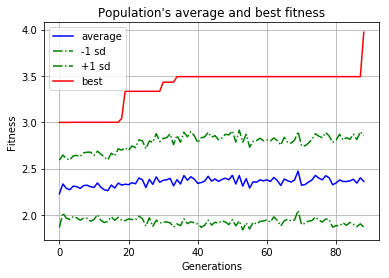

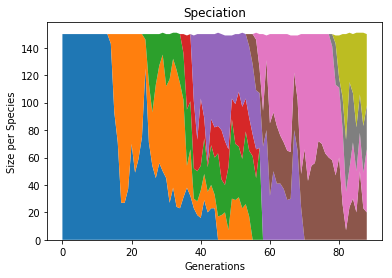

Mean genetic distance 1.321, standard deviation 0.506
Mean genetic distance 1.348, standard deviation 0.518
Mean genetic distance 1.441, standard deviation 0.543
Mean genetic distance 1.602, standard deviation 0.502
Mean genetic distance 1.612, standard deviation 0.519
Mean genetic distance 1.702, standard deviation 0.511
Mean genetic distance 1.760, standard deviation 0.479
Mean genetic distance 1.844, standard deviation 0.471
Mean genetic distance 2.047, standard deviation 0.519
Mean genetic distance 1.985, standard deviation 0.492


In [5]:
run('config-feedforward')  # ejecuta 